## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

# Warnings handling :
import warnings 
warnings.filterwarnings('ignore')

## Exploratory data analysis

In [2]:
df = pd.read_csv('creditcard.csv')

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Observing different features in the data :

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Confirming that there are No Null values :

df.isnull().sum()/df.isnull().count()*100

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.shape

(284807, 31)

Here we will observe the distribution of our classes

In [6]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

Cases = 
Normal = 284315
Fraud = 492


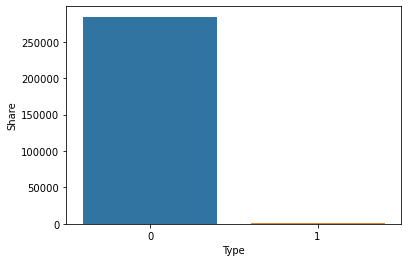

In [7]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
print('Cases = ')
print('Normal =',classes[0])
print('Fraud =',classes[1])

join1 = pd.DataFrame({'Type':classes.index, 'Share':classes.values})
sns.barplot(data=join1, x=join1.Type, y=join1.Share)

Percentage Split : 
normal_share=  99.83
fraud_share=  0.17


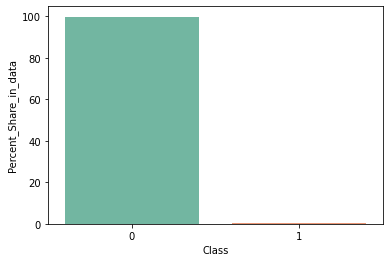

In [8]:
print('Percentage Split : ')
print('normal_share= ', normal_share.round(2))
print('fraud_share= ', fraud_share.round(2))

ax1 = sns.barplot(data=df, x=df.Class, y=df.Class, estimator=lambda x: len(x) / len(df) * 100, palette = 'Set2')
ax1.set(ylabel="Percent_Share_in_data")
ax1

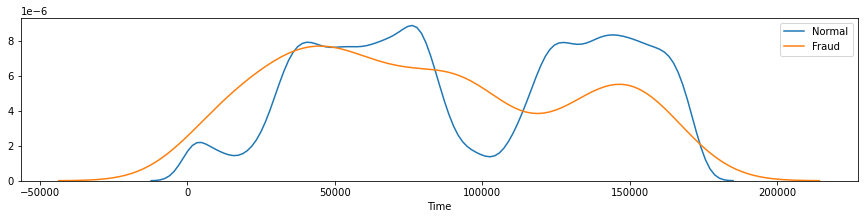

In [9]:
## Scatter plot to observe the distribution of classes with time
normal_time = df.loc[df['Class']==0]['Time']
fraud_time = df.loc[df['Class']==1]['Time']

plt.subplots(figsize=(15,3))
sns.distplot(normal_time, hist = False, label='Normal')
sns.distplot(fraud_time, hist = False, label='Fraud')

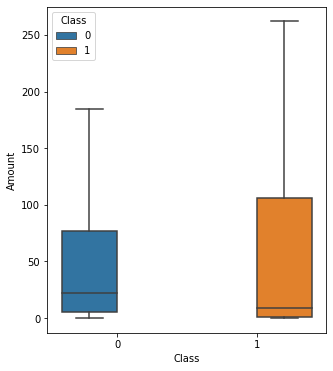

In [10]:
# Observe the distribution of classes with Amount
normal_amount = df.loc[df['Class']==0]['Amount']
fraud_amount = df.loc[df['Class']==1]['Amount']

plt.subplots(figsize=(5,6))

sns.boxplot(x=df['Class'], y=df['Amount'], showfliers=False, hue=df.Class)

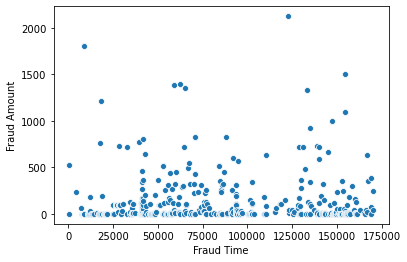

In [12]:
ax11 = sns.scatterplot(data = df, y=fraud_amount, x= df.Time)
ax11.set(ylabel="Fraud Amount")
ax11.set(xlabel="Fraud Time")
ax11

In [13]:
print ('Normal Transactions:',normal_amount.describe().round(1))
print('\n')
print ('Fraud Transactions :', fraud_amount.describe().round(1))

Normal Transactions: count    284315.0
mean         88.3
std         250.1
min           0.0
25%           5.6
50%          22.0
75%          77.0
max       25691.2
Name: Amount, dtype: float64


Fraud Transactions : count     492.0
mean      122.2
std       256.7
min         0.0
25%         1.0
50%         9.2
75%       105.9
max      2125.9
Name: Amount, dtype: float64


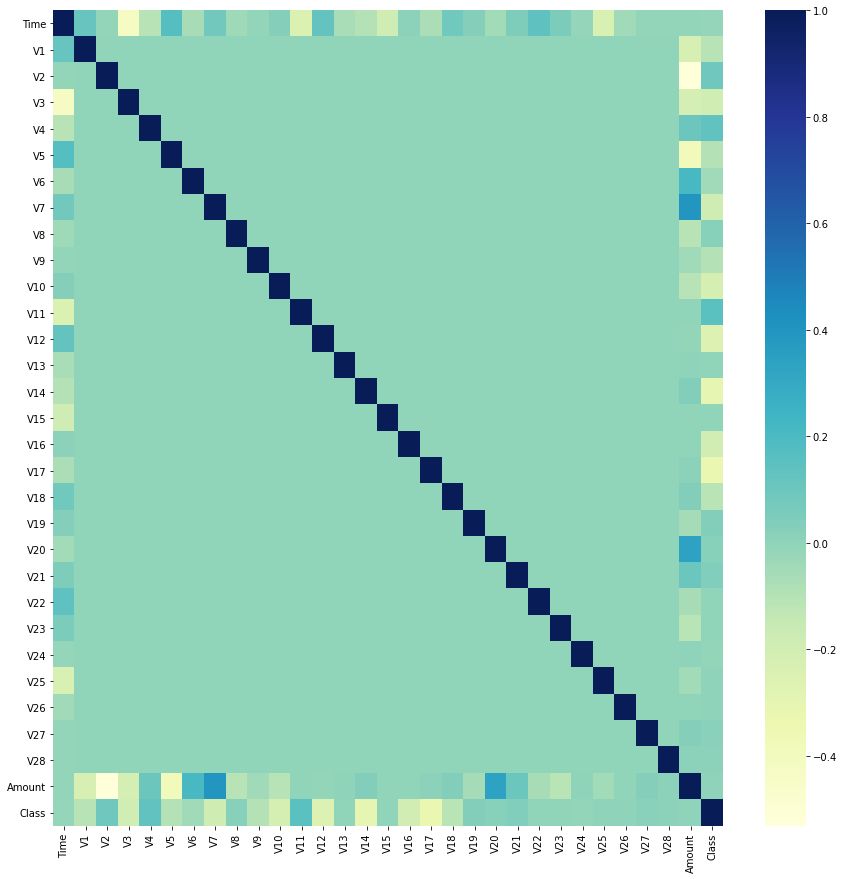

In [11]:
# Checking Correlations so that to drop un-necessary columns.

plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), annot=False, cmap='YlGnBu')

### Splitting the data into train & test data

In [2]:
y= df.Class
X = df.drop('Class', axis=1)

NameError: name 'df' is not defined

In [16]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


## Stratified Train Test Split :

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split  # Importing the needed library for train test split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100, stratify=y)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [14]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
344
148


### Plotting the distribution of Variables :

In [15]:
cols_x = X.columns  # All the feature variables:
cols_x

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

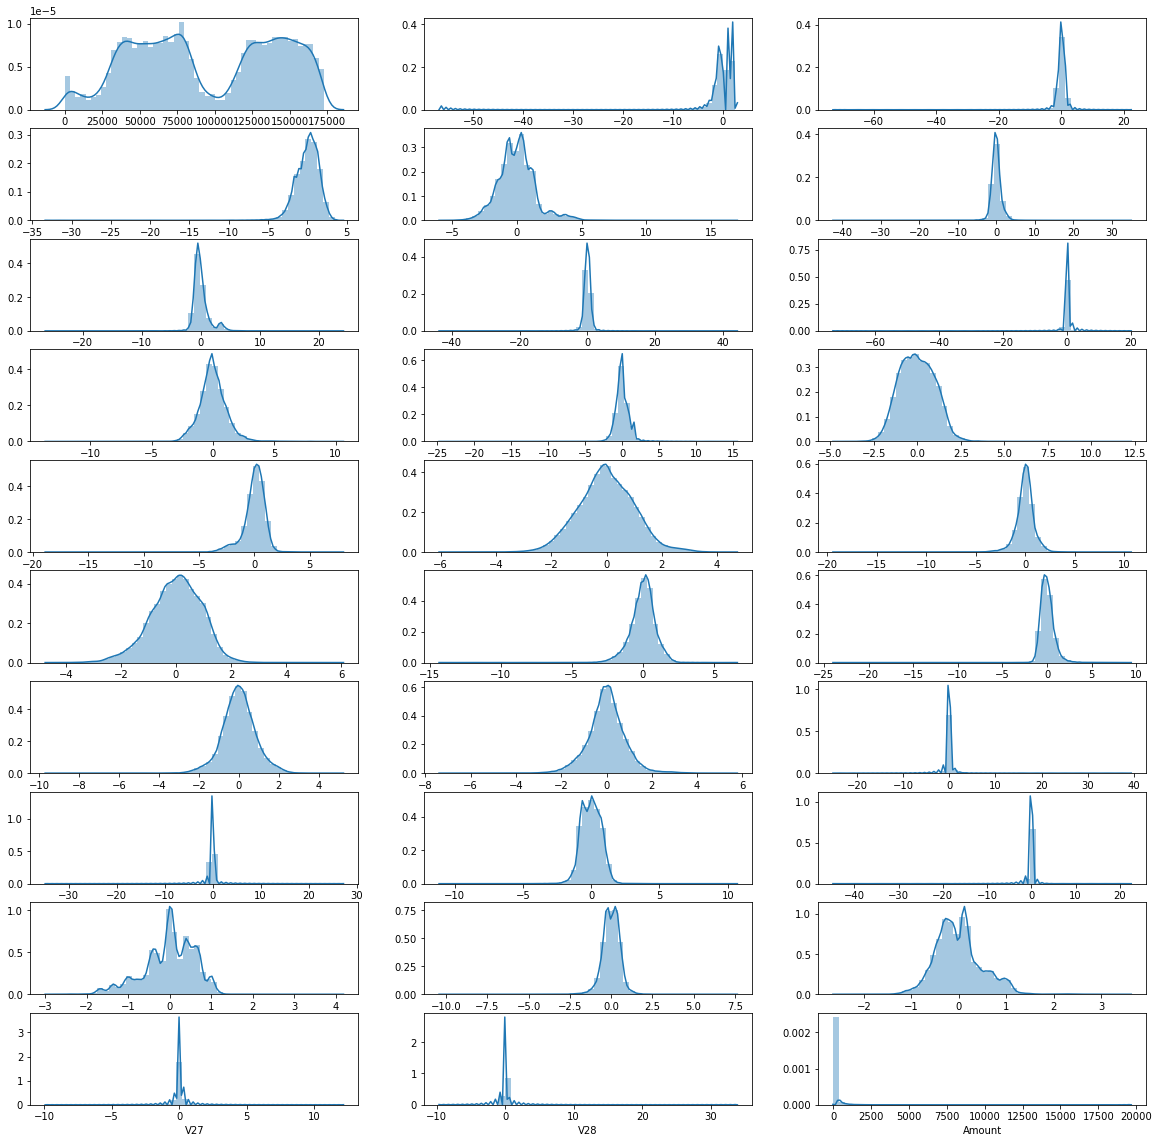

In [20]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#Distribution plot of the numeric variables
fig, ax = plt.subplots(10,3, figsize=(20,20))

dummy = 0
for ftr in cols_x:
    dummy = dummy + 1
    plt.subplot(10,3,dummy)
    sns.distplot(X_train[ftr])
fig.show()

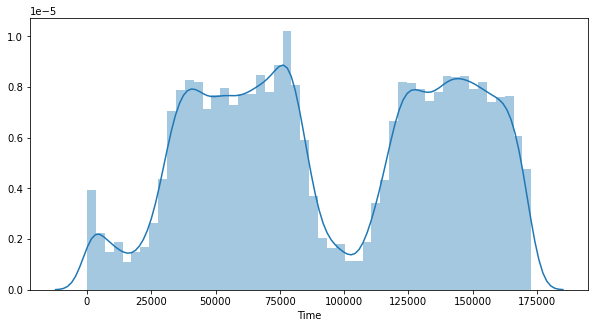

In [21]:
# plot the histogram of a variable from the dataset to see the skewness

plt.figure(figsize=(10,5)) # set figure size
sns.distplot(X.Time) # plotting the distribution

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [16]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

from sklearn.preprocessing import PolynomialFeatures, PowerTransformer

pt = PowerTransformer(copy=False, standardize=True)   # Creating instance for X transformation
pt.fit(X_train)                       ## Fit the PT on training data
X_train_pt = pt.transform(X_train)    ## Then apply on all features
X_test_pt = pt.transform(X_test)

In [17]:
# plot the histogram of a variable from the dataset again to see the result 

X_train_dfpt = pd.DataFrame(X_train_pt)
X_test_dfpt = pd.DataFrame(X_test_pt)


X_train_dfpt.columns = X_train.columns
X_test_dfpt.columns = X_test.columns

C:\Users\z002j4kw\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


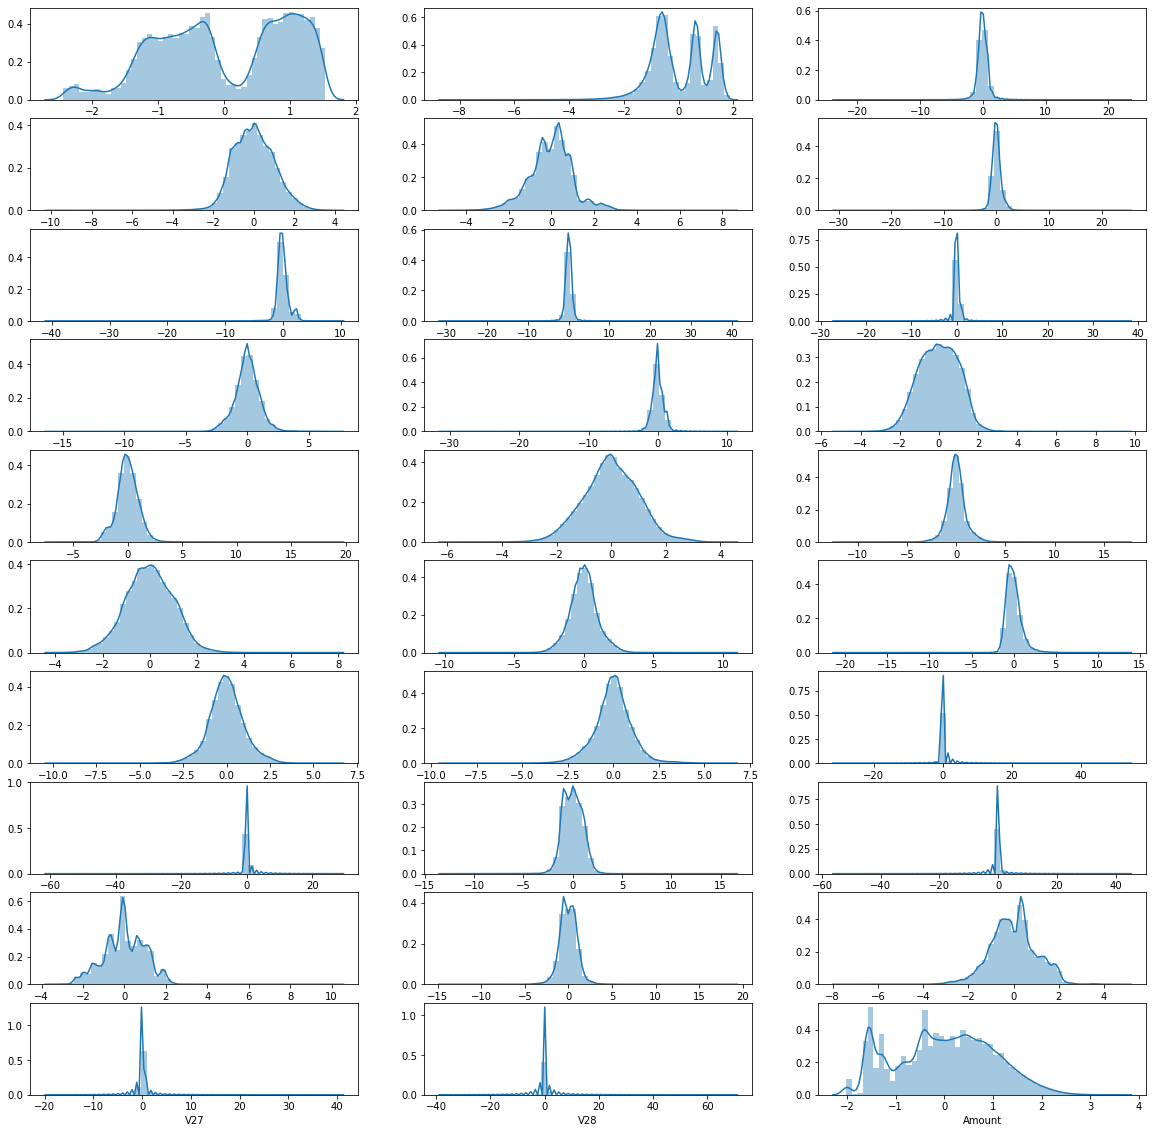

In [18]:
fig, ax = plt.subplots(10,3, figsize=(20,20))

dummy = 0
for ftr in X_train_dfpt.columns:
    dummy = dummy + 1
    plt.subplot(10,3,dummy)
    sns.distplot(X_train_dfpt[ftr])
fig.show()

So we will use below for further Model Building :
1. X_train_dfpt   (Power Transformed Training Dataset of Features)
2. X_test_dfpt    (Power Transformed Test Dataset of Features)
3. y_train        (Train Dataset of Target Variable)
4. y_test         (Test Dataset of Target Variable)

## Model Building
- Build different models on the imbalanced dataset and see the result

<font color = red>

## Model M1 : 
### Logistic Regression (Imbalanced data)
    

In [20]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression #import the package

logreg = LogisticRegression()
logreg.fit(X_train_dfpt, y_train) 

LogisticRegression()

In [21]:
y_pred = logreg.predict(X_test_dfpt)  # Prediction using this Model

In [22]:
print('Metrics for Model M1 : Logistic regression with Imbalanced data')
print('Accuracy :{}'.format(metrics.accuracy_score(y_test,y_pred).round(3)))
print('AUC : {}'.format(metrics.roc_auc_score(y_test , y_pred).round(3)))
print('Precision : {}'.format(metrics.precision_score(y_test , y_pred).round(3)))
print('Recall : {}'.format(metrics.recall_score(y_test , y_pred).round(3)))
print('F1 : {}'.format(metrics.f1_score(y_test , y_pred).round(3)))

Metrics for Model M1 : Logistic regression with Imbalanced data
Accuracy :0.999
AUC : 0.811
Precision : 0.836
Recall : 0.622
F1 : 0.713


In [23]:
#ROC curve :
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

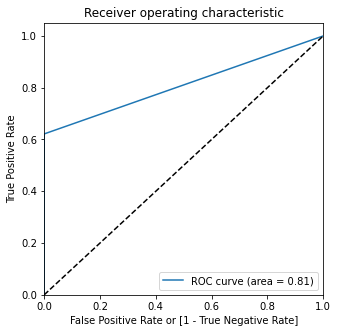

In [24]:
roc1 = draw_roc(y_test, y_pred) # Plot the ROC Curve
roc1

<font color = blue>
    
### 3-Fold Cross Validation & gridsearchCV

In [30]:
#perform cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE


# CREATION OF CROSS VALIDATION SCHEME :
folds = KFold(n_splits = 3, shuffle = True, random_state = 100)

# RANGE OF HYPERPARAMETER TO TUNE :
hyper_params = [{'n_features_to_select': list(range(2, 20))}]


# set up GridSearchCV() - Specify the Model
lm = LogisticRegression()
lm.fit(X_train_dfpt, y_train)
rfe = RFE(lm)  

# Perform GRIDSEARCHCV() with all initialized parameters above : 
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_dfpt, y_train)                  


Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed: 11.5min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
             estimator=RFE(estimator=LogisticRegression()),
             param_grid=[{'n_features_to_select': [2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                   11, 12, 13, 14, 15, 16, 17,
                                                   18, 19]}],
             return_train_score=True, scoring='roc_auc', verbose=1)

In [31]:
# Check CV results found above :
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,16.313666,1.001720,0.031334,0.003679,2,{'n_features_to_select': 2},0.937557,0.971982,0.975773,0.961771,0.017192,18,0.973935,0.956033,0.955208,0.961725,0.008640
1,15.348347,0.554924,0.028989,0.003572,3,{'n_features_to_select': 3},0.960769,0.980990,0.986769,0.976176,0.011147,17,0.983835,0.973638,0.969475,0.975650,0.006032
2,15.254509,0.467321,0.035335,0.004494,4,{'n_features_to_select': 4},0.959755,0.984139,0.988332,0.977408,0.012600,7,0.984515,0.976421,0.974516,0.978484,0.004335
3,14.952000,0.892346,0.028333,0.000472,5,{'n_features_to_select': 5},0.963268,0.982172,0.988020,0.977820,0.010563,2,0.986801,0.977197,0.974355,0.979451,0.005325
4,14.313999,0.624271,0.037675,0.007717,6,{'n_features_to_select': 6},0.961928,0.983466,0.987786,0.977726,0.011310,3,0.986786,0.976816,0.975007,0.979536,0.005179
5,13.591335,0.316509,0.030668,0.003090,7,{'n_features_to_select': 7},0.961349,0.983325,0.987666,0.977446,0.011520,6,0.986434,0.977515,0.976155,0.980035,0.004559
6,12.905667,0.147494,0.033669,0.004026,8,{'n_features_to_select': 8},0.959043,0.981696,0.988401,0.976380,0.012561,16,0.986918,0.980228,0.978709,0.981952,0.003566
7,12.666346,0.192647,0.039667,0.007930,9,{'n_features_to_select': 9},0.961488,0.982285,0.988281,0.977351,0.011481,8,0.986653,0.981867,0.979661,0.982727,0.002919
8,12.714668,0.106773,0.044333,0.007038,10,{'n_features_to_select': 10},0.960761,0.981878,0.988435,0.977025,0.011807,10,0.986690,0.981650,0.979910,0.982750,0.002875
9,12.591001,0.295801,0.034000,0.004548,11,{'n_features_to_select': 11},0.962638,0.981682,0.988764,0.977695,0.011032,4,0.986524,0.982007,0.980156,0.982896,0.002675


<font color = blue>
 
### Best Hyperparameters

In [32]:
# BEST PARAMETERS OBTAINED :
print(model_cv.best_estimator_.get_params())

{'estimator__C': 1.0, 'estimator__class_weight': None, 'estimator__dual': False, 'estimator__fit_intercept': True, 'estimator__intercept_scaling': 1, 'estimator__l1_ratio': None, 'estimator__max_iter': 100, 'estimator__multi_class': 'auto', 'estimator__n_jobs': None, 'estimator__penalty': 'l2', 'estimator__random_state': None, 'estimator__solver': 'lbfgs', 'estimator__tol': 0.0001, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': LogisticRegression(), 'n_features_to_select': 14, 'step': 1, 'verbose': 0}


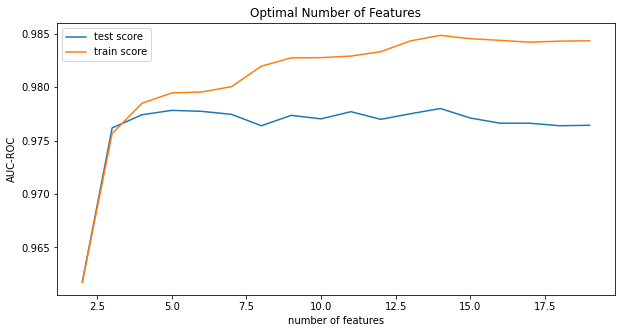

In [33]:
# plotting cv results
plt.figure(figsize=(10,5))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('AUC-ROC')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

<font color = red>
 
## Model M2 : 
### Logistic Regression with Tuned Hyperparameter (Imbalanced Data)

In [34]:
n_features_optimal = 14  # Tuned Hyperparameter 

lm = LogisticRegression()  # Instiation & Uniform Oversampling of Class_Weight
lm.fit(X_train_dfpt, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train_dfpt, y_train)

# predict prices of X_test
y_pred_lr1 = lm.predict(X_test_dfpt)

In [35]:
print('Metrics for Model M2 : Logistic regression with Hyperparameter Tuning on Imbalance Data')
print('Accuracy :{}'.format(metrics.accuracy_score(y_test,y_pred_lr1).round(3)))
print('AUC : {}'.format(metrics.roc_auc_score(y_test , y_pred_lr1).round(3)))
print('Precision : {}'.format(metrics.precision_score(y_test , y_pred_lr1).round(3)))
print('Recall : {}'.format(metrics.recall_score(y_test , y_pred_lr1).round(3)))
print('F1 : {}'.format(metrics.f1_score(y_test , y_pred_lr1).round(3)))

Metrics for Model M2 : Logistic regression with Hyperparameter Tuning on Imbalance Data
Accuracy :0.999
AUC : 0.811
Precision : 0.836
Recall : 0.622
F1 : 0.713


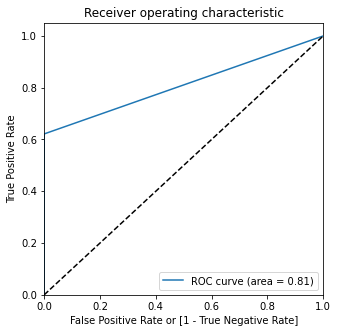

In [36]:
roc2 = draw_roc(y_test, y_pred_lr1) # Plot the ROC Curve
roc2

<font color = red>
 

## Model M3 : 
### Logistic Regression with Tuned Hyperparameter and Uniform Oversampling to address Data Imbalance :

In [37]:
# final model
n_features_optimal = 14  # Tuned Hyperparameter 

lm = LogisticRegression(class_weight='balanced')  # Instiation & Uniform Oversampling of Class_Weight
lm.fit(X_train_dfpt, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train_dfpt, y_train)

# predict prices of X_test
y_pred_lr = lm.predict(X_test_dfpt)

In [38]:
print('Metrics for Model M3 : Logistic regression with Uniform Oversampling & Hyperparameter Tuning')
print('Accuracy :{}'.format(metrics.accuracy_score(y_test,y_pred_lr).round(3)))
print('AUC : {}'.format(metrics.roc_auc_score(y_test , y_pred_lr).round(3)))
print('Precision : {}'.format(metrics.precision_score(y_test , y_pred_lr).round(3)))
print('Recall : {}'.format(metrics.recall_score(y_test , y_pred_lr).round(3)))
print('F1 : {}'.format(metrics.f1_score(y_test , y_pred_lr).round(3)))

Metrics for Model M3 : Logistic regression with Uniform Oversampling & Hyperparameter Tuning
Accuracy :0.975
AUC : 0.93
Precision : 0.059
Recall : 0.885
F1 : 0.11


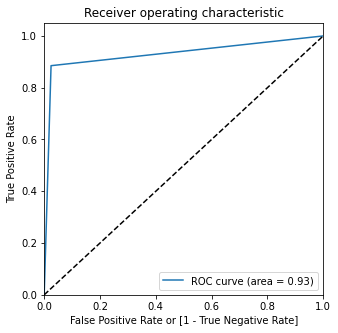

In [39]:
roc3 = draw_roc(y_test, y_pred_lr) # Plot the ROC Curve
roc3

<font color = red>
 

## Model M4 : 
### Decision Tree with default hyperparameters (Imbalanced Data) :

In [40]:
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters
dt_default = DecisionTreeClassifier(random_state=100)
dt_default.fit(X_train_dfpt, y_train)

DecisionTreeClassifier(random_state=100)

In [41]:
# Making predictions
y_pred_default_dt = dt_default.predict(X_test_dfpt)

In [42]:
print('Metrics for Model M4 :     Decision Tree, Default hyper parameters & data Imbalance not addressed')
print('Accuracy :{}'.format(metrics.accuracy_score(y_test,y_pred_default_dt).round(3)))
print('AUC : {}'.format(metrics.roc_auc_score(y_test , y_pred_default_dt).round(3)))
print('Precision : {}'.format(metrics.precision_score(y_test , y_pred_default_dt).round(3)))
print('Recall : {}'.format(metrics.recall_score(y_test , y_pred_default_dt).round(3)))
print('F1 : {}'.format(metrics.f1_score(y_test , y_pred_default_dt).round(3)))

Metrics for Model M4 :     Decision Tree, Default hyper parameters & data Imbalance not addressed
Accuracy :0.999
AUC : 0.871
Precision : 0.733
Recall : 0.743
F1 : 0.738


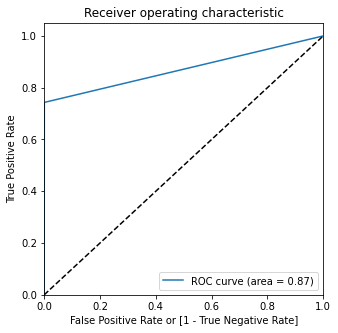

In [43]:
roc4 = draw_roc(y_test, y_pred_default_dt) # Plot the ROC Curve
roc4

<font color = red>
 

## Model M5 : 
### Decision Tree with default hyperparameters and class_weights = balanced :

In [44]:
# Fitting the decision tree with default hyperparameters & class weight = balanced
dt_default_ub = DecisionTreeClassifier(class_weight='balanced',random_state=100)
dt_default_ub.fit(X_train_dfpt, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=100)

In [45]:
# Making predictions for class weight = balanced  (ub = uniform oversampling)
y_pred_default_dt_ub = dt_default_ub.predict(X_test_dfpt)

In [46]:
print('Metrics for Model M5 :     Decision Tree, Default hyper parameters & data Imbalance addressed by uniform oversampling')
print('Accuracy :{}'.format(metrics.accuracy_score(y_test,y_pred_default_dt_ub).round(3)))
print('AUC : {}'.format(metrics.roc_auc_score(y_test , y_pred_default_dt_ub).round(3)))
print('Precision : {}'.format(metrics.precision_score(y_test , y_pred_default_dt_ub).round(3)))
print('Recall : {}'.format(metrics.recall_score(y_test , y_pred_default_dt_ub).round(3)))
print('F1 : {}'.format(metrics.f1_score(y_test , y_pred_default_dt_ub).round(3)))

Metrics for Model M5 :     Decision Tree, Default hyper parameters & data Imbalance addressed by uniform oversampling
Accuracy :0.999
AUC : 0.895
Precision : 0.718
Recall : 0.791
F1 : 0.752


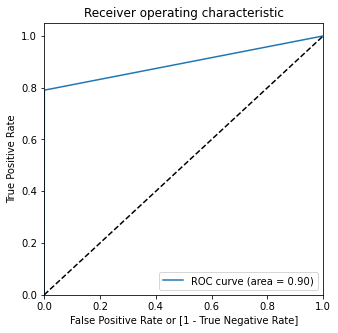

In [47]:
roc5 = draw_roc(y_test, y_pred_default_dt_ub) # Plot the ROC Curve
roc5

<font color = red>
 

## Model M6 : 
### Random Forest with default hyperparameters and class_weights = balanced :

In [48]:
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced', random_state=100)

In [49]:
# fitting on the train data
rfc.fit(X_train_dfpt,y_train)

RandomForestClassifier(class_weight='balanced', random_state=100)

In [50]:
# Making predictions
y_pred_rf = rfc.predict(X_test_dfpt)

In [51]:
print('Metrics for Model M6 :     Random Forest with default hyperparameters and class_weights = balanced')
print('Accuracy :{}'.format(metrics.accuracy_score(y_test,y_pred_rf).round(3)))
print('AUC : {}'.format(metrics.roc_auc_score(y_test , y_pred_rf).round(3)))
print('Precision : {}'.format(metrics.precision_score(y_test , y_pred_rf).round(3)))
print('Recall : {}'.format(metrics.recall_score(y_test , y_pred_rf).round(3)))
print('F1 : {}'.format(metrics.f1_score(y_test , y_pred_rf).round(3)))

Metrics for Model M6 :     Random Forest with default hyperparameters and class_weights = balanced
Accuracy :0.999
AUC : 0.878
Precision : 0.933
Recall : 0.757
F1 : 0.836


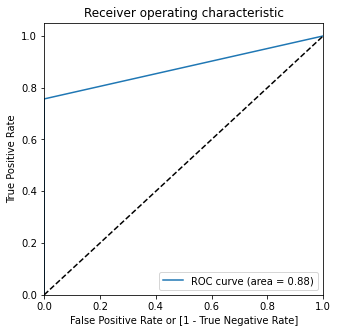

In [52]:
roc6 = draw_roc(y_test, y_pred_rf) # Plot the ROC Curve
roc6

<font color = red>
 

## Model M7 : 
### Random Forest with hyperparameter tuning and class_weights = balanced :

### Gridsearch

In [53]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'max_features': [5, 10, 15]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced',random_state=100)
# Instantiate the grid search model
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1,scoring='roc_auc')

In [54]:
# Fit the grid search to the data
grid_search.fit(X_train_dfpt, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed: 10.5min finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10, 15]},
             scoring='roc_auc', verbose=1)

In [55]:
# printing the optimal AUC-ROC and hyperparameters
print('We can get AUC-ROC of',grid_search.best_score_.round(2),'using',grid_search.best_params_)

We can get AUC-ROC of 0.98 using {'max_depth': 4, 'max_features': 10}


#### So using these  hyperparameters to build the model & predict on Test dataset -->   'max_depth': 4, 'max_features': 10

In [56]:
# model with the best hyperparameters
rfhyper = RandomForestClassifier(max_depth=4,
                             max_features=10,
                             class_weight='balanced',random_state=100)

# fitting the model
rfhyper.fit(X_train_dfpt,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4, max_features=10,
                       random_state=100)

In [57]:
# Making predictions
y_pred_rfhyper = rfhyper.predict(X_test_dfpt)

In [58]:
print('Metrics for Model M7 :     Random Forest with hyperparameter tuning and class_weights = balanced')
print('Accuracy :{}'.format(metrics.accuracy_score(y_test,y_pred_rfhyper).round(3)))
print('AUC : {}'.format(metrics.roc_auc_score(y_test , y_pred_rfhyper).round(3)))
print('Precision : {}'.format(metrics.precision_score(y_test , y_pred_rfhyper).round(3)))
print('Recall : {}'.format(metrics.recall_score(y_test , y_pred_rfhyper).round(3)))
print('F1 : {}'.format(metrics.f1_score(y_test , y_pred_rfhyper).round(3)))

Metrics for Model M7 :     Random Forest with hyperparameter tuning and class_weights = balanced
Accuracy :0.995
AUC : 0.923
Precision : 0.236
Recall : 0.851
F1 : 0.37


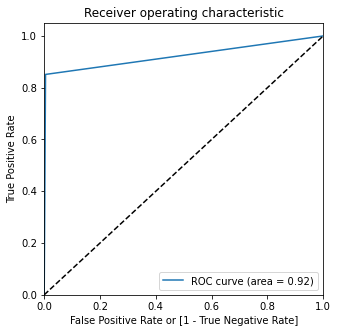

In [59]:
roc7 = draw_roc(y_test, y_pred_rfhyper) # Plot the ROC Curve
roc7

<font color = red>
 

## Model M8 : 
### XGBoost with optimum number of trees (Imbalanced Data) :

In [68]:
import xgboost   # had to pip install xgboost before this
from xgboost import XGBClassifier   # import xgb classifier

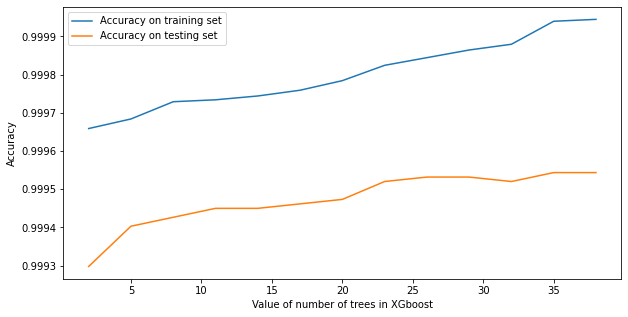

In [72]:
tree_range = range(2, 40, 3)   # Here we find optimum number of trees for tuning the n_estimators parameter in XGBoost.
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree)
    xgb.fit(X_train_dfpt,y_train)   # fit the model on train set
    score1.append(xgb.score(X_train_dfpt,y_train))   # check score on 
    score2.append(xgb.score(X_test_dfpt,y_test))
    
%matplotlib inline
plt.figure(figsize=(10,5))
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('Accuracy')
plt.legend()

In [77]:
xgb=XGBClassifier(n_estimators=35)
xgb.fit(X_train_dfpt,y_train)  # fitting the model with tuned parameter

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=35, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [78]:
y_pred_xgb = xgb.predict(X_test_dfpt)

In [79]:
print('Metrics for Model M8 :  XGBoost with optimum number of trees')
print('Accuracy :{}'.format(metrics.accuracy_score(y_test,y_pred_xgb).round(3)))
print('AUC : {}'.format(metrics.roc_auc_score(y_test , y_pred_xgb).round(3)))
print('Precision : {}'.format(metrics.precision_score(y_test , y_pred_xgb).round(3)))
print('Recall : {}'.format(metrics.recall_score(y_test , y_pred_xgb).round(3)))
print('F1 : {}'.format(metrics.f1_score(y_test , y_pred_xgb).round(3)))

Metrics for Model M8 :  XGBoost with optimum number of trees
Accuracy :1.0
AUC : 0.895
Precision : 0.936
Recall : 0.791
F1 : 0.857


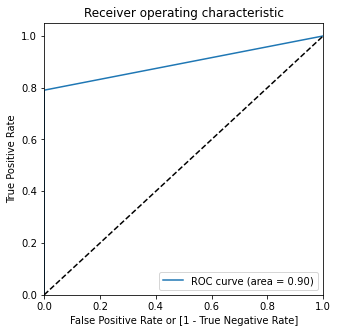

In [82]:
roc8 = draw_roc(y_test, y_pred_xgb) # Plot the ROC Curve
roc8

<font color = brown>

# Summary of Models without using any special oversampling techniques :

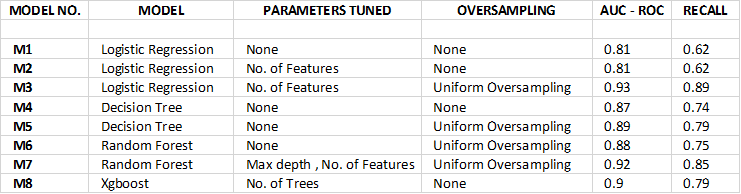

<font color = brown>
    
#### The basis of selecting top models is :
- High AUC ROC & Recall
- Scope of further improvement in Scores with advanced Oversampling techniques

## Top 3 Models are :

#### A ) Logistic Regression (Model M3)

#### B ) Random Forest with Hyperparameter Tuning (Model M7)  
    
#### C ) XGBoost with Optimal Number of Trees (Model M8)
    

### Print the important features of the best model to understand the dataset

Top var = 18
2nd Top var = 15
3rd Top var = 28


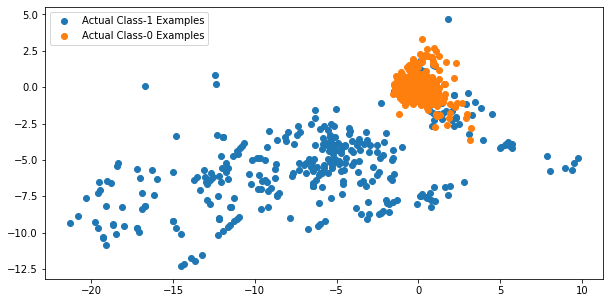

In [94]:
var_imp = []
for i in xgb.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb.feature_importances_)[-3])+1)

# Variable on Index-18 and Index-15 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb.feature_importances_)[-2])

X_train_1 = X_train_dfpt.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train_dfpt.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

<font color = brown>
    
As the Data is PCA transformed so much information cannot be retrieved from this.

<font color = brown>

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

<font color = brown>

# Random Oversampling with top 3 performer models :

<font color = red>
 

## Model M9 :  
### Logistic regression with Hyperparameter Tuning & Random Oversampling

In [102]:
 # pip install imbalanced-learn before this step 
from imblearn.over_sampling import RandomOverSampler #- import the packages

ros = RandomOverSampler(random_state=42)  # Creating a Random Oversampler instance

X_ros, y_ros = ros.fit_resample(X_train_dfpt, y_train)  # Random Oversampling on Train Data Set

### We can use this X_ros and y_ros as Random Oversampled training data hereafter.

In [154]:
#perform cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE


# CREATION OF CROSS VALIDATION SCHEME :
folds = KFold(n_splits = 3, shuffle = True, random_state = 100)

# RANGE OF HYPERPARAMETER TO TUNE :
hyper_params = [{'n_features_to_select': list(range(2, 20))}]


# set up GridSearchCV() - Specify the Model
lr_ros = LogisticRegression()
lr_ros.fit(X_ros, y_ros)
rfe_ros = RFE(lr_ros)  

# Perform GRIDSEARCHCV() with all initialized parameters above : 
model_cv = GridSearchCV(estimator = rfe_ros, 
                        param_grid = hyper_params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_ros, y_ros)   

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed: 22.4min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
             estimator=RFE(estimator=LogisticRegression()),
             param_grid=[{'n_features_to_select': [2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                   11, 12, 13, 14, 15, 16, 17,
                                                   18, 19]}],
             return_train_score=True, scoring='roc_auc', verbose=1)

In [156]:
# Check CV results found above :
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,30.526405,1.804649,0.077336,0.005907,2,{'n_features_to_select': 2},0.982223,0.982639,0.982606,0.982490,0.000189,18,0.982613,0.982412,0.982443,0.982490,0.000088
1,28.576126,0.441340,0.082015,0.008963,3,{'n_features_to_select': 3},0.984006,0.984431,0.984109,0.984182,0.000181,17,0.984290,0.984069,0.984193,0.984184,0.000090
2,28.753368,0.873573,0.077666,0.006851,4,{'n_features_to_select': 4},0.985424,0.985850,0.985637,0.985637,0.000174,16,0.985770,0.985538,0.985614,0.985641,0.000096
3,28.133213,0.790568,0.081334,0.012710,5,{'n_features_to_select': 5},0.986284,0.986828,0.986698,0.986603,0.000232,15,0.986775,0.986496,0.986557,0.986609,0.000120
4,26.948412,0.282641,0.074334,0.004496,6,{'n_features_to_select': 6},0.987441,0.987966,0.987854,0.987754,0.000226,14,0.987937,0.987650,0.987691,0.987759,0.000127
5,27.106091,0.387079,0.079666,0.008954,7,{'n_features_to_select': 7},0.988309,0.988777,0.988672,0.988586,0.000201,13,0.988766,0.988486,0.988521,0.988591,0.000125
6,25.636754,0.470823,0.086665,0.003858,8,{'n_features_to_select': 8},0.988627,0.989042,0.989011,0.988894,0.000189,12,0.989078,0.988817,0.988808,0.988901,0.000125
7,25.141598,0.444808,0.083330,0.011898,9,{'n_features_to_select': 9},0.989056,0.989519,0.989089,0.989221,0.000211,11,0.989530,0.989235,0.988885,0.989217,0.000264
8,23.716751,0.213662,0.067669,0.002056,10,{'n_features_to_select': 10},0.989088,0.989503,0.989242,0.989278,0.000171,10,0.989528,0.989256,0.989047,0.989277,0.000197
9,24.092103,0.680967,0.085999,0.010229,11,{'n_features_to_select': 11},0.989191,0.989570,0.989210,0.989324,0.000174,9,0.989598,0.989351,0.989035,0.989328,0.000231


In [157]:
# BEST PARAMETERS OBTAINED :
print(model_cv.best_estimator_.get_params())
best_params_ros = model_cv.best_estimator_.get_params()

{'estimator__C': 1.0, 'estimator__class_weight': None, 'estimator__dual': False, 'estimator__fit_intercept': True, 'estimator__intercept_scaling': 1, 'estimator__l1_ratio': None, 'estimator__max_iter': 100, 'estimator__multi_class': 'auto', 'estimator__n_jobs': None, 'estimator__penalty': 'l2', 'estimator__random_state': None, 'estimator__solver': 'lbfgs', 'estimator__tol': 0.0001, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': LogisticRegression(), 'n_features_to_select': 18, 'step': 1, 'verbose': 0}


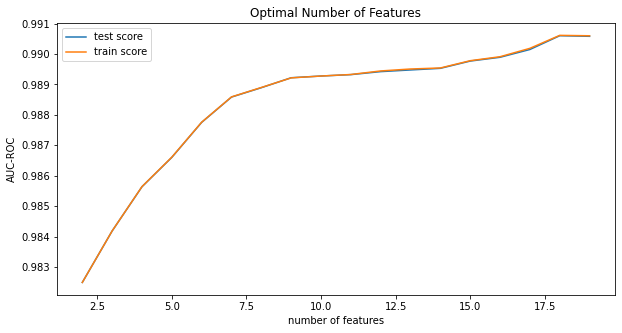

In [158]:
# plotting cv results
plt.figure(figsize=(10,5))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('AUC-ROC')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [159]:
## n_features_optimal = 19  # Tuned Hyperparameter 

lr_ros = LogisticRegression()
lr_ros.fit(X_ros, y_ros)

rfe_ros_lr = RFE(lr_ros, n_features_to_select=19)             
rfe_ros_lr = rfe_ros_lr.fit(X_ros, y_ros)

# predict prices of X_test
y_pred_lr1_ros = rfe_ros_lr.predict(X_test_dfpt)

In [160]:
print('Metrics for Model M9 : Logistic regression with Hyperparameter Tuning & Random Oversampling')
print('Accuracy :{}'.format(metrics.accuracy_score(y_test,y_pred_lr1_ros).round(3)))
print('AUC : {}'.format(metrics.roc_auc_score(y_test , y_pred_lr1_ros).round(3)))
print('Precision : {}'.format(metrics.precision_score(y_test , y_pred_lr1_ros).round(3)))
print('Recall : {}'.format(metrics.recall_score(y_test , y_pred_lr1_ros).round(3)))
print('F1 : {}'.format(metrics.f1_score(y_test , y_pred_lr1_ros).round(3)))

Metrics for Model M9 : Logistic regression with Hyperparameter Tuning & Random Oversampling
Accuracy :0.975
AUC : 0.93
Precision : 0.058
Recall : 0.885
F1 : 0.109


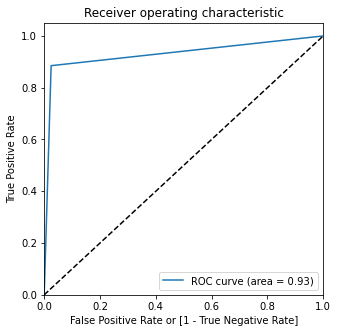

In [161]:
roc9 = draw_roc(y_test, y_pred_lr1_ros) # Plot the ROC Curve
roc9

<font color = red>
 

## Model 10 :  
### Random Forest with hyperparameter tuning and Random Oversampling

In [123]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'max_features': [5, 10, 15, 20]
}
# Create a based model
rf_ros = RandomForestClassifier(random_state=100)  # Class Weight = balanced is removed
# Instantiate the grid search model
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = rf_ros, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1,scoring='roc_auc')

In [124]:
# Fit the grid search to the data
grid_search.fit(X_ros, y_ros)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 26.5min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10],
                         'max_features': [5, 10, 15, 20]},
             scoring='roc_auc', verbose=1)

In [125]:
# printing the optimal AUC-ROC and hyperparameters
print('We can get AUC-ROC of',grid_search.best_score_.round(2),'using',grid_search.best_params_)

We can get AUC-ROC of 1.0 using {'max_depth': 10, 'max_features': 5}


##### Lets predict the results using these hyperparameters.

In [126]:
# model with the best hyperparameters
rfhyper_ros = RandomForestClassifier(max_depth=10,  max_features=5, random_state=100)

# fitting the model
rfhyper_ros.fit(X_ros,y_ros)

RandomForestClassifier(max_depth=10, max_features=5, random_state=100)

In [127]:
# Making predictions
y_pred_rfhyper_ros = rfhyper_ros.predict(X_test_dfpt)

In [129]:
print('Metrics for Model M10 : Random Forest with hyperparameter tuning and Random Oversampling')
print('Accuracy :{}'.format(metrics.accuracy_score(y_test,y_pred_rfhyper_ros).round(3)))
print('AUC : {}'.format(metrics.roc_auc_score(y_test , y_pred_rfhyper_ros).round(3)))
print('Precision : {}'.format(metrics.precision_score(y_test , y_pred_rfhyper_ros).round(3)))
print('Recall : {}'.format(metrics.recall_score(y_test , y_pred_rfhyper_ros).round(3)))
print('F1 : {}'.format(metrics.f1_score(y_test , y_pred_rfhyper_ros).round(3)))

Metrics for Model M10 : Random Forest with hyperparameter tuning and Random Oversampling
Accuracy :0.999
AUC : 0.915
Precision : 0.769
Recall : 0.831
F1 : 0.799


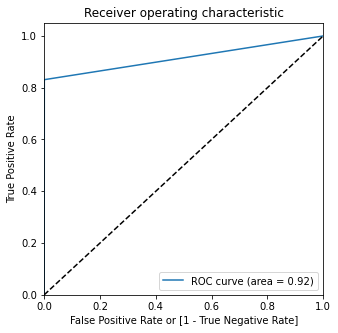

In [131]:
roc10 = draw_roc(y_test, y_pred_rfhyper_ros) # Plot the ROC Curve
roc10

<font color = red>
 

## Model 11 :  
### XGBoost with tuned number of trees and Random Oversampling

In [132]:
import xgboost   # had to pip install xgboost before this
from xgboost import XGBClassifier   # import xgb classifier

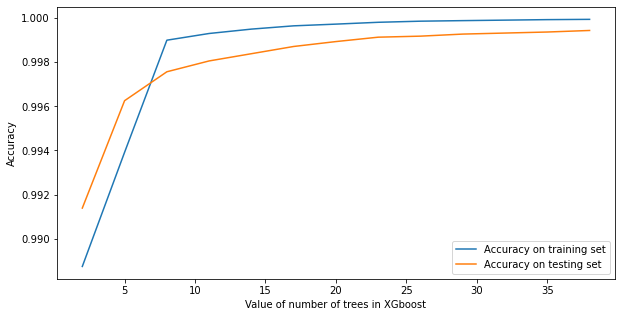

In [133]:
tree_range = range(2, 40, 3)   # Here we find optimum number of trees for tuning the n_estimators parameter in XGBoost.
score1=[]
score2=[]
for tree in tree_range:
    xgb_ros=XGBClassifier(n_estimators=tree)
    xgb_ros.fit(X_ros,y_ros)   # fit the model on train set
    score1.append(xgb_ros.score(X_ros,y_ros))   # check score on 
    score2.append(xgb_ros.score(X_test_dfpt,y_test))
    
%matplotlib inline
plt.figure(figsize=(10,5))
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('Accuracy')
plt.legend()

23 Seems to be a good tree count where the accuracy is the highest. 

Though our Metric is not Accuracy for this case - Let us keep n_estimators = 23 and create a model further

In [148]:
xgb_ros=XGBClassifier(n_estimators=23)
xgb_ros.fit(X_ros,y_ros)  # fitting the model with tuned parameter

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=23, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [149]:
# Prediction on the data using tuned XGBoost
y_pred_xgb_ros = xgb_ros.predict(X_test_dfpt)

In [150]:
print('Metrics for Model 11 :  XGBoost with tuned number of trees and Random Oversampling')
print('Accuracy :{}'.format(metrics.accuracy_score(y_test,y_pred_xgb_ros).round(3)))
print('AUC : {}'.format(metrics.roc_auc_score(y_test , y_pred_xgb_ros).round(3)))
print('Precision : {}'.format(metrics.precision_score(y_test , y_pred_xgb_ros).round(3)))
print('Recall : {}'.format(metrics.recall_score(y_test , y_pred_xgb_ros).round(3)))
print('F1 : {}'.format(metrics.f1_score(y_test , y_pred_xgb_ros).round(3)))

Metrics for Model 11 :  XGBoost with tuned number of trees and Random Oversampling
Accuracy :0.999
AUC : 0.922
Precision : 0.71
Recall : 0.845
F1 : 0.772


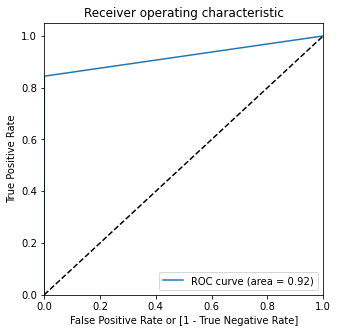

In [151]:
roc11 = draw_roc(y_test, y_pred_xgb_ros) # Plot the ROC Curve
roc11

# SMOTE with top 3 performing models : 

In [25]:
from imblearn.over_sampling import SMOTE  #importing SMOTE package

In [27]:
sm = SMOTE(random_state=42)  #initialization
X_sos, y_sos = sm.fit_resample(X_train_dfpt, y_train)  #Oversampling with SMOTE

<font color = red>
 

## Model 12 :  
### Logistic regression with Hyperparameter Tuning & SMOTE

In [155]:
#perform cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE


# CREATION OF CROSS VALIDATION SCHEME :
folds = KFold(n_splits = 3, shuffle = True, random_state = 100)

# RANGE OF HYPERPARAMETER TO TUNE :
hyper_params = [{'n_features_to_select': list(range(2, 20))}]


# set up GridSearchCV() - Specify the Model
lr_sos = LogisticRegression()
lr_sos.fit(X_sos, y_sos)
rfe_sos = RFE(lr_sos)  

# Perform GRIDSEARCHCV() with all initialized parameters above : 
model_cv = GridSearchCV(estimator = rfe_sos, 
                        param_grid = hyper_params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_sos, y_sos)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed: 21.6min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
             estimator=RFE(estimator=LogisticRegression()),
             param_grid=[{'n_features_to_select': [2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                   11, 12, 13, 14, 15, 16, 17,
                                                   18, 19]}],
             return_train_score=True, scoring='roc_auc', verbose=1)

In [162]:
# Check CV results found above :
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,30.526405,1.804649,0.077336,0.005907,2,{'n_features_to_select': 2},0.982223,0.982639,0.982606,0.982490,0.000189,18,0.982613,0.982412,0.982443,0.982490,0.000088
1,28.576126,0.441340,0.082015,0.008963,3,{'n_features_to_select': 3},0.984006,0.984431,0.984109,0.984182,0.000181,17,0.984290,0.984069,0.984193,0.984184,0.000090
2,28.753368,0.873573,0.077666,0.006851,4,{'n_features_to_select': 4},0.985424,0.985850,0.985637,0.985637,0.000174,16,0.985770,0.985538,0.985614,0.985641,0.000096
3,28.133213,0.790568,0.081334,0.012710,5,{'n_features_to_select': 5},0.986284,0.986828,0.986698,0.986603,0.000232,15,0.986775,0.986496,0.986557,0.986609,0.000120
4,26.948412,0.282641,0.074334,0.004496,6,{'n_features_to_select': 6},0.987441,0.987966,0.987854,0.987754,0.000226,14,0.987937,0.987650,0.987691,0.987759,0.000127
5,27.106091,0.387079,0.079666,0.008954,7,{'n_features_to_select': 7},0.988309,0.988777,0.988672,0.988586,0.000201,13,0.988766,0.988486,0.988521,0.988591,0.000125
6,25.636754,0.470823,0.086665,0.003858,8,{'n_features_to_select': 8},0.988627,0.989042,0.989011,0.988894,0.000189,12,0.989078,0.988817,0.988808,0.988901,0.000125
7,25.141598,0.444808,0.083330,0.011898,9,{'n_features_to_select': 9},0.989056,0.989519,0.989089,0.989221,0.000211,11,0.989530,0.989235,0.988885,0.989217,0.000264
8,23.716751,0.213662,0.067669,0.002056,10,{'n_features_to_select': 10},0.989088,0.989503,0.989242,0.989278,0.000171,10,0.989528,0.989256,0.989047,0.989277,0.000197
9,24.092103,0.680967,0.085999,0.010229,11,{'n_features_to_select': 11},0.989191,0.989570,0.989210,0.989324,0.000174,9,0.989598,0.989351,0.989035,0.989328,0.000231


In [163]:
# BEST PARAMETERS OBTAINED :
print(model_cv.best_estimator_.get_params())
best_params_sos = model_cv.best_estimator_.get_params()

{'estimator__C': 1.0, 'estimator__class_weight': None, 'estimator__dual': False, 'estimator__fit_intercept': True, 'estimator__intercept_scaling': 1, 'estimator__l1_ratio': None, 'estimator__max_iter': 100, 'estimator__multi_class': 'auto', 'estimator__n_jobs': None, 'estimator__penalty': 'l2', 'estimator__random_state': None, 'estimator__solver': 'lbfgs', 'estimator__tol': 0.0001, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': LogisticRegression(), 'n_features_to_select': 18, 'step': 1, 'verbose': 0}


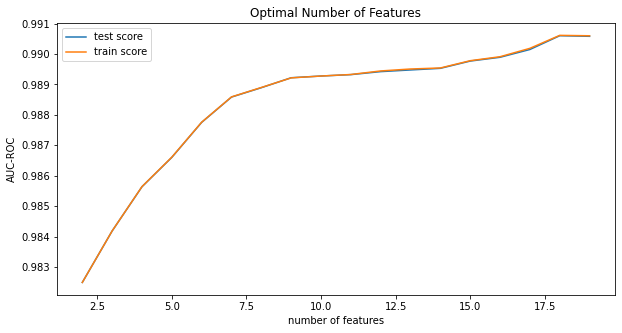

In [164]:
# plotting cv results
plt.figure(figsize=(10,5))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('AUC-ROC')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [45]:
from sklearn.feature_selection import RFE

n_features_optimal = 18  # Tuned Hyperparameter 

lm_sos = LogisticRegression()  # Instantiation
lm_sos.fit(X_sos, y_sos)

rfe_sos = RFE(lm_sos, n_features_to_select=n_features_optimal)             
rfe_sos = rfe_sos.fit(X_sos, y_sos)

# predict prices of X_test
y_pred_lr1_sos = lm_sos.predict(X_test_dfpt)

In [46]:
print('Metrics for Model M12 : Logistic regression with Hyperparameter Tuning & SMOTE')
print('Accuracy :{}'.format(metrics.accuracy_score(y_test,y_pred_lr1_sos).round(3)))
print('AUC : {}'.format(metrics.roc_auc_score(y_test , y_pred_lr1_sos).round(3)))
print('Precision : {}'.format(metrics.precision_score(y_test , y_pred_lr1_sos).round(3)))
print('Recall : {}'.format(metrics.recall_score(y_test , y_pred_lr1_sos).round(3)))
print('F1 : {}'.format(metrics.f1_score(y_test , y_pred_lr1_sos).round(3)))

Metrics for Model M12 : Logistic regression with Hyperparameter Tuning & SMOTE
Accuracy :0.974
AUC : 0.933
Precision : 0.057
Recall : 0.892
F1 : 0.106


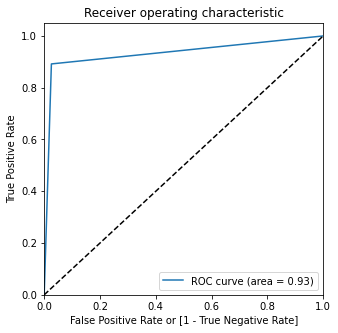

In [171]:
roc12 = draw_roc(y_test, y_pred_lr1_sos) # Plot the ROC Curve
roc12

<font color = red>
 
## Model M13 :
### Random Forest with hyperparameter tuning and SMOTE :

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'max_features': [5, 10, 15]
}
# Create a based model
rf_sos = RandomForestClassifier(random_state=100)
# Instantiate the grid search model
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = rf_sos, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1,scoring='roc_auc')

In [31]:
# Fit the grid search to the data
grid_search.fit(X_sos, y_sos)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed: 28.0min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10, 15]},
             scoring='roc_auc', verbose=1)

In [32]:
# printing the optimal AUC-ROC and hyperparameters
print('We can get AUC-ROC of',grid_search.best_score_.round(2),'using',grid_search.best_params_)

We can get AUC-ROC of 1.0 using {'max_depth': 10, 'max_features': 10}


In [33]:
# model with the best hyperparameters
rfhyper_sos = RandomForestClassifier(max_depth=10,max_features=10,random_state=100)

# fitting the model
rfhyper_sos.fit(X_sos,y_sos)

RandomForestClassifier(max_depth=10, max_features=10, random_state=100)

In [34]:
# Making predictions
y_pred_rfhyper_sos = rfhyper_sos.predict(X_test_dfpt)

In [35]:
print('Metrics for Model M13 :  Random Forest with hyperparameter tuning and SMOTE :')
print('Accuracy :{}'.format(metrics.accuracy_score(y_test,y_pred_rfhyper_sos).round(3)))
print('AUC : {}'.format(metrics.roc_auc_score(y_test , y_pred_rfhyper_sos).round(3)))
print('Precision : {}'.format(metrics.precision_score(y_test , y_pred_rfhyper_sos).round(3)))
print('Recall : {}'.format(metrics.recall_score(y_test , y_pred_rfhyper_sos).round(3)))
print('F1 : {}'.format(metrics.f1_score(y_test , y_pred_rfhyper_sos).round(3)))

Metrics for Model M13 :  Random Forest with hyperparameter tuning and SMOTE :
Accuracy :0.998
AUC : 0.928
Precision : 0.481
Recall : 0.858
F1 : 0.617


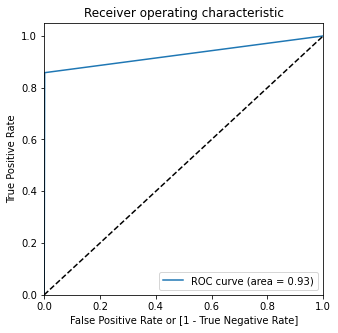

In [36]:
roc13 = draw_roc(y_test, y_pred_rfhyper_sos) # Plot the ROC Curve
roc13

<font color = red>
 

## Model 14 :  
### XGBoost with tuned number of trees and SMOTE

In [38]:
import xgboost   # had to pip install xgboost before this
from xgboost import XGBClassifier   # import xgb classifier

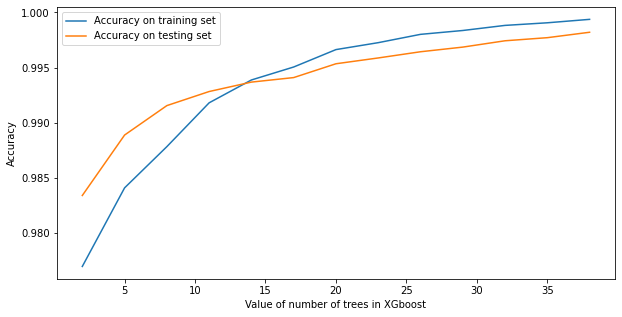

In [39]:
tree_range = range(2, 40, 3)   # Here we find optimum number of trees for tuning the n_estimators parameter in XGBoost.
score1=[]
score2=[]
for tree in tree_range:
    xgb_sos=XGBClassifier(n_estimators=tree)
    xgb_sos.fit(X_sos,y_sos)   # fit the model on train set
    score1.append(xgb_sos.score(X_sos,y_sos))   # check score on 
    score2.append(xgb_sos.score(X_test_dfpt,y_test))
    
%matplotlib inline
plt.figure(figsize=(10,5))
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('Accuracy')
plt.legend()

We can use the Junction point of above graph

In [40]:
xgb_sos=XGBClassifier(n_estimators=14)
xgb_sos.fit(X_sos,y_sos)  # fitting the model with tuned parameter

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=14, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [41]:
# Prediction on the data using tuned XGBoost
y_pred_xgb_sos = xgb_sos.predict(X_test_dfpt)

In [42]:
print('Metrics for Model 14 :  XGBoost with tuned number of trees and SMOTE')
print('Accuracy :{}'.format(metrics.accuracy_score(y_test,y_pred_xgb_sos).round(3)))
print('AUC : {}'.format(metrics.roc_auc_score(y_test , y_pred_xgb_sos).round(3)))
print('Precision : {}'.format(metrics.precision_score(y_test , y_pred_xgb_sos).round(3)))
print('Recall : {}'.format(metrics.recall_score(y_test , y_pred_xgb_sos).round(3)))
print('F1 : {}'.format(metrics.f1_score(y_test , y_pred_xgb_sos).round(3)))

Metrics for Model 14 :  XGBoost with tuned number of trees and SMOTE
Accuracy :0.994
AUC : 0.929
Precision : 0.198
Recall : 0.865
F1 : 0.322


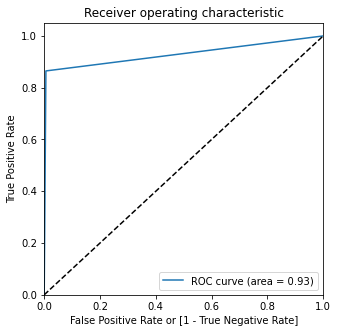

In [43]:
roc14 = draw_roc(y_test, y_pred_xgb_sos) # Plot the ROC Curve
roc14

The best AUC-ROC we have got by applying SMOTE is 0.933.

Let us observe the class distribution of SMOTE before we can proceed with further modelling.

### Print the class distribution after applying SMOTE 

In [51]:
from imblearn.over_sampling import SMOTE

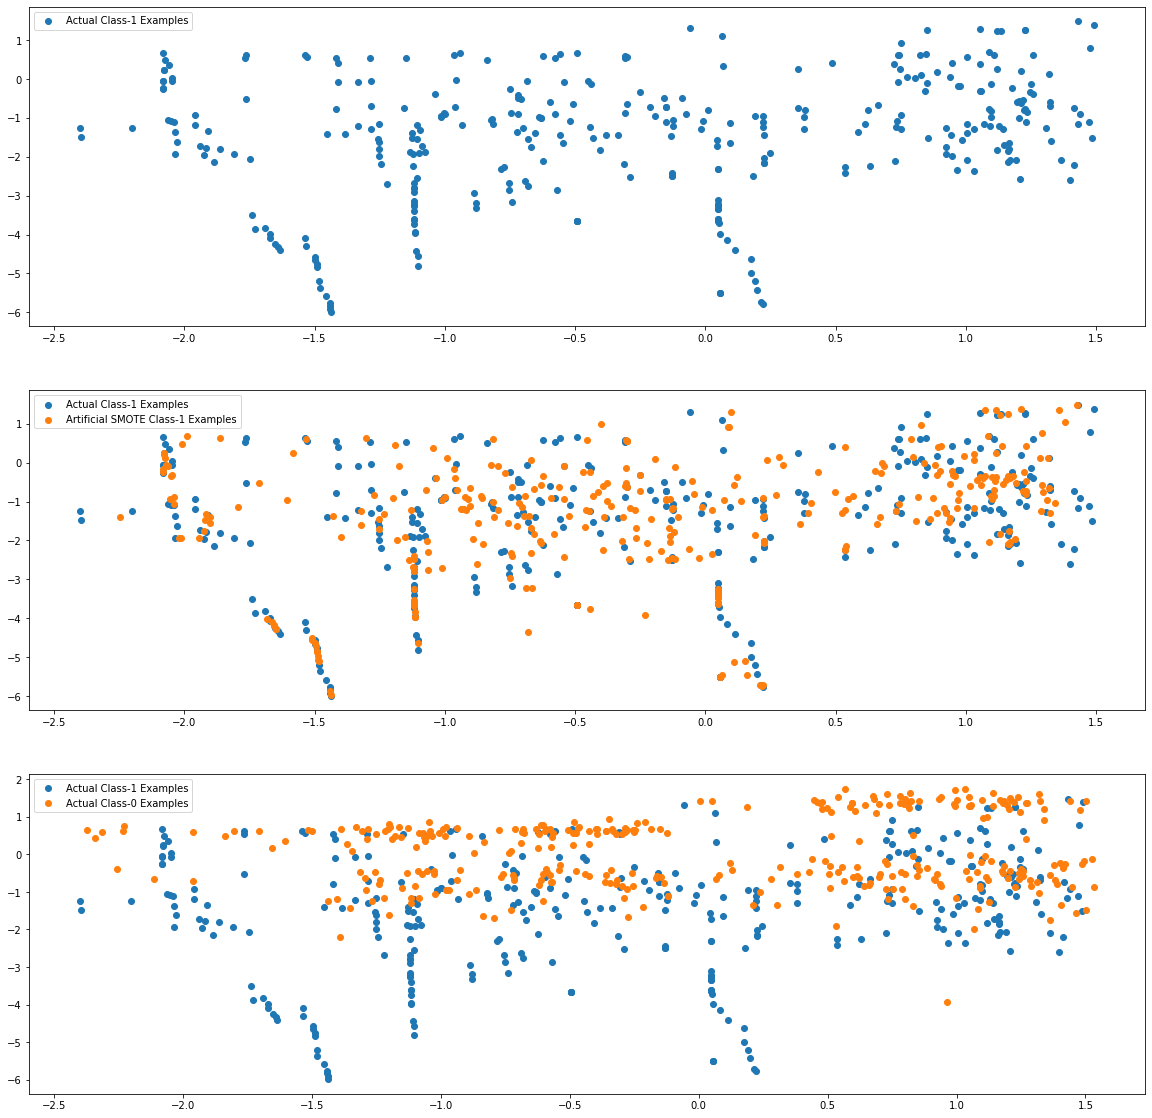

In [54]:
import warnings
warnings.filterwarnings("ignore")



sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train_dfpt, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote.iloc[X_train.shape[0]:].values

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

# ADASYN with top 3 performing models :

In [55]:
from imblearn.over_sampling import ADASYN

In [56]:
ada = ADASYN(random_state=42)
X_ada, y_ada = ada.fit_resample(X_train_dfpt, y_train)  #Oversampling with ADASYN

### Print the class distribution after applying ADASYN

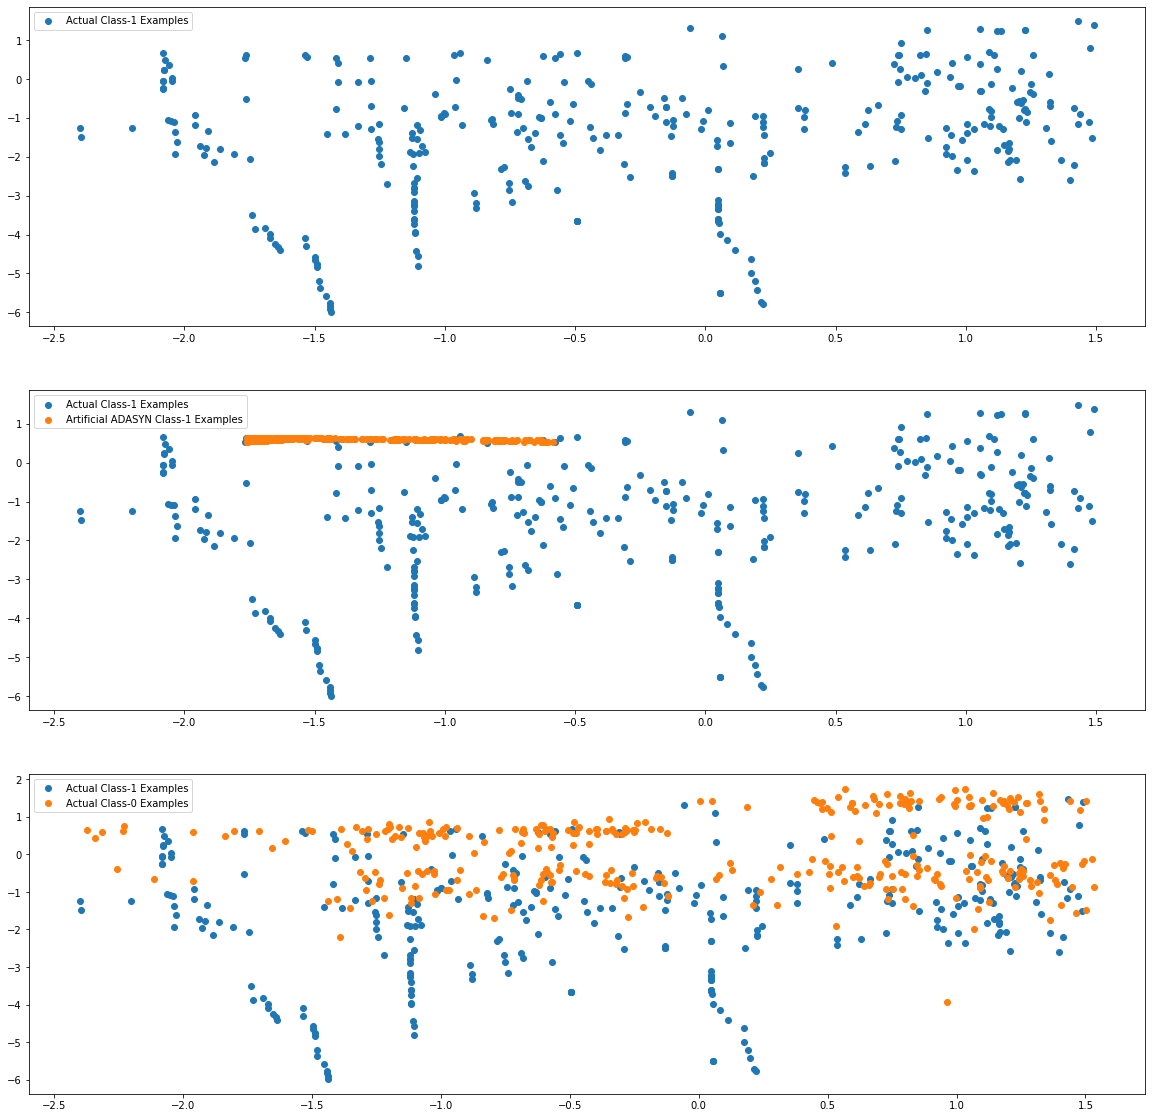

In [57]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train_dfpt, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn.iloc[X_train.shape[0]:].values

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### X_ada, y_ada are obtained after ADASYN. Lets build our top 3 models using these :

<font color = red>
 

## Model 15 :  
### Logistic regression with Hyperparameter Tuning & ADASYN

In [59]:
#perform cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE


# CREATION OF CROSS VALIDATION SCHEME :
folds = KFold(n_splits = 3, shuffle = True, random_state = 100)

# RANGE OF HYPERPARAMETER TO TUNE :
hyper_params = [{'n_features_to_select': list(range(2, 20))}]


# set up GridSearchCV() - Specify the Model
lr_ada = LogisticRegression()
lr_ada.fit(X_ada, y_ada)
rfe_ada = RFE(lr_ada)  

# Perform GRIDSEARCHCV() with all initialized parameters above : 
model_cv_ada = GridSearchCV(estimator = rfe_ada, 
                        param_grid = hyper_params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv_ada.fit(X_ada, y_ada)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed: 19.8min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
             estimator=RFE(estimator=LogisticRegression()),
             param_grid=[{'n_features_to_select': [2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                   11, 12, 13, 14, 15, 16, 17,
                                                   18, 19]}],
             return_train_score=True, scoring='roc_auc', verbose=1)

In [60]:
# Check CV results found above :
cv_results_ada = pd.DataFrame(model_cv_ada.cv_results_)
cv_results_ada

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,27.078335,1.000333,0.067002,0.006975,2,{'n_features_to_select': 2},0.932162,0.932990,0.934857,0.933337,0.001127,18,0.933935,0.933519,0.932580,0.933345,0.000567
1,27.277000,0.158495,0.079332,0.013573,3,{'n_features_to_select': 3},0.936781,0.937654,0.939496,0.937977,0.001132,17,0.938655,0.938120,0.937187,0.937987,0.000606
2,26.941668,0.715093,0.088666,0.010627,4,{'n_features_to_select': 4},0.943492,0.944469,0.945733,0.944565,0.000918,16,0.945198,0.944598,0.943943,0.944580,0.000513
3,25.018666,0.204345,0.076668,0.007134,5,{'n_features_to_select': 5},0.947676,0.948532,0.949764,0.948657,0.000857,15,0.949238,0.948700,0.948084,0.948674,0.000471
4,27.920331,0.964348,0.094337,0.005557,6,{'n_features_to_select': 6},0.953128,0.953897,0.954913,0.953979,0.000731,14,0.954501,0.953999,0.953479,0.953993,0.000417
5,26.070664,0.948297,0.095005,0.004323,7,{'n_features_to_select': 7},0.956704,0.957483,0.958367,0.957518,0.000680,13,0.958033,0.957518,0.957054,0.957535,0.000400
6,23.562983,1.053709,0.087667,0.003093,8,{'n_features_to_select': 8},0.957699,0.958428,0.959187,0.958438,0.000608,12,0.958927,0.958427,0.958004,0.958453,0.000377
7,25.327332,0.712969,0.090665,0.006181,9,{'n_features_to_select': 9},0.958705,0.959141,0.960027,0.959291,0.000550,11,0.959698,0.959345,0.958886,0.959310,0.000332
8,22.091670,0.194875,0.087666,0.010146,10,{'n_features_to_select': 10},0.959082,0.959532,0.960439,0.959684,0.000565,10,0.960103,0.959739,0.959266,0.959703,0.000343
9,20.811666,0.133183,0.084001,0.014166,11,{'n_features_to_select': 11},0.959856,0.960289,0.960690,0.960278,0.000341,9,0.960884,0.960524,0.959501,0.960303,0.000586


In [62]:
# BEST PARAMETERS OBTAINED :
print(model_cv_ada.best_estimator_.get_params())
best_params_ada = model_cv_ada.best_estimator_.get_params()

{'estimator__C': 1.0, 'estimator__class_weight': None, 'estimator__dual': False, 'estimator__fit_intercept': True, 'estimator__intercept_scaling': 1, 'estimator__l1_ratio': None, 'estimator__max_iter': 100, 'estimator__multi_class': 'auto', 'estimator__n_jobs': None, 'estimator__penalty': 'l2', 'estimator__random_state': None, 'estimator__solver': 'lbfgs', 'estimator__tol': 0.0001, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': LogisticRegression(), 'n_features_to_select': 19, 'step': 1, 'verbose': 0}


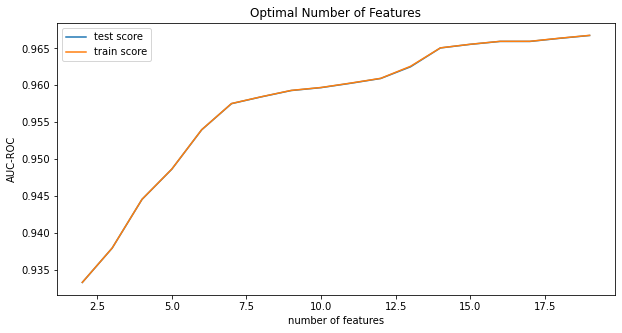

In [63]:
# plotting cv results
plt.figure(figsize=(10,5))

plt.plot(cv_results_ada["param_n_features_to_select"], cv_results_ada["mean_test_score"])
plt.plot(cv_results_ada["param_n_features_to_select"], cv_results_ada["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('AUC-ROC')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [64]:
n_features_optimal = 15  # Tuned Hyperparameter 

lm_ada = LogisticRegression()  # Instantiation
lm_ada.fit(X_ada, y_ada)

rfe_ada = RFE(lm_ada, n_features_to_select=n_features_optimal)             
rfe_ada = rfe_ada.fit(X_ada, y_ada)

# predict prices of X_test
y_pred_lr1_ada = lm_ada.predict(X_test_dfpt)

In [65]:
print('Metrics for Model M15 : Logistic regression with Hyperparameter Tuning & ADASYN')
print('Accuracy :{}'.format(metrics.accuracy_score(y_test,y_pred_lr1_ada).round(3)))
print('AUC : {}'.format(metrics.roc_auc_score(y_test , y_pred_lr1_ada).round(3)))
print('Precision : {}'.format(metrics.precision_score(y_test , y_pred_lr1_ada).round(3)))
print('Recall : {}'.format(metrics.recall_score(y_test , y_pred_lr1_ada).round(3)))
print('F1 : {}'.format(metrics.f1_score(y_test , y_pred_lr1_ada).round(3)))

Metrics for Model M15 : Logistic regression with Hyperparameter Tuning & ADASYN
Accuracy :0.915
AUC : 0.927
Precision : 0.019
Recall : 0.939
F1 : 0.037


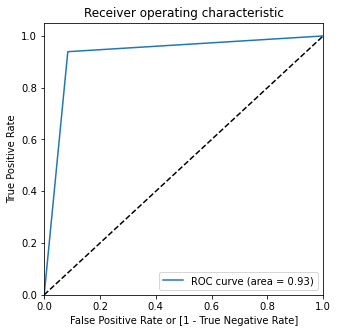

In [66]:
roc15 = draw_roc(y_test, y_pred_lr1_ada) # Plot the ROC Curve
roc15

<font color = red>
 

## Model 16 :  
### Random Forest with hyperparameter tuning and ADASYN

In [68]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'max_features': [5, 10, 15, 20]
}
# Create a based model
rf_ada = RandomForestClassifier(random_state=100)  # Class Weight = balanced is removed
# Instantiate the grid search model
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = rf_ada, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1,scoring='roc_auc')

In [69]:
# Fit the grid search to the data
grid_search.fit(X_ada, y_ada)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 40.2min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10],
                         'max_features': [5, 10, 15, 20]},
             scoring='roc_auc', verbose=1)

In [70]:
# printing the optimal AUC-ROC and hyperparameters
print('We can get AUC-ROC of',grid_search.best_score_.round(2),'using',grid_search.best_params_)

We can get AUC-ROC of 0.99 using {'max_depth': 10, 'max_features': 10}


In [71]:
# model with the best hyperparameters using the best score parameters above
rfhyper_ada = RandomForestClassifier(max_depth=10,  max_features=10, random_state=100)

# fitting the model
rfhyper_ada.fit(X_ada,y_ada)

RandomForestClassifier(max_depth=10, max_features=10, random_state=100)

In [72]:
# Making predictions
y_pred_rfhyper_ada = rfhyper_ada.predict(X_test_dfpt)

In [73]:
print('Metrics for Model M16 : Random Forest with hyperparameter tuning and ADASYN')
print('Accuracy :{}'.format(metrics.accuracy_score(y_test,y_pred_rfhyper_ada).round(3)))
print('AUC : {}'.format(metrics.roc_auc_score(y_test , y_pred_rfhyper_ada).round(3)))
print('Precision : {}'.format(metrics.precision_score(y_test , y_pred_rfhyper_ada).round(3)))
print('Recall : {}'.format(metrics.recall_score(y_test , y_pred_rfhyper_ada).round(3)))
print('F1 : {}'.format(metrics.f1_score(y_test , y_pred_rfhyper_ada).round(3)))

Metrics for Model M16 : Random Forest with hyperparameter tuning and ADASYN
Accuracy :0.988
AUC : 0.923
Precision : 0.115
Recall : 0.858
F1 : 0.203


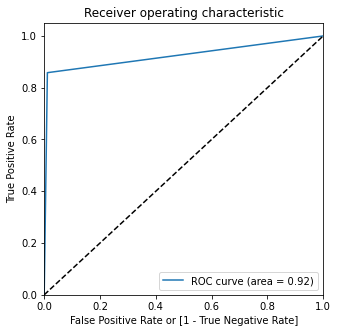

In [74]:
roc16 = draw_roc(y_test, y_pred_rfhyper_ada) # Plot the ROC Curve
roc16

<font color = red>
 

## Model 17 :  
### XGBoost with tuned number of trees and ADASYN

In [75]:
import xgboost   # had to pip install xgboost before this
from xgboost import XGBClassifier   # import xgb classifier

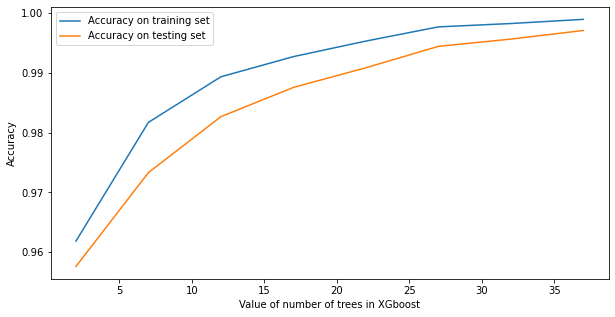

In [76]:
tree_range = range(2, 40, 5)   # Here we find optimum number of trees for tuning the n_estimators parameter in XGBoost.
score1=[]
score2=[]
for tree in tree_range:
    xgb_ada=XGBClassifier(n_estimators=tree)
    xgb_ada.fit(X_ada,y_ada)   # fit the model on train set
    score1.append(xgb_ada.score(X_ada,y_ada))   # check score on 
    score2.append(xgb_ada.score(X_test_dfpt,y_test))
    
%matplotlib inline
plt.figure(figsize=(10,5))
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('Accuracy')
plt.legend()

#### 26 seems a good value based on above graph for number of trees in XGboost

In [98]:
xgb_ada=XGBClassifier(n_estimators=26)
xgb_ada.fit(X_ada,y_ada)  # fitting the model with tuned parameter

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=26, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [99]:
# Prediction on the data using tuned XGBoost
y_pred_xgb_ada = xgb_ada.predict(X_test_dfpt)

In [100]:
print('Metrics for Model 17 :  XGBoost with tuned number of trees and ADASYN')
print('Accuracy :{}'.format(metrics.accuracy_score(y_test,y_pred_xgb_ada).round(3)))
print('AUC : {}'.format(metrics.roc_auc_score(y_test , y_pred_xgb_ada).round(3)))
print('Precision : {}'.format(metrics.precision_score(y_test , y_pred_xgb_ada).round(3)))
print('Recall : {}'.format(metrics.recall_score(y_test , y_pred_xgb_ada).round(3)))
print('F1 : {}'.format(metrics.f1_score(y_test , y_pred_xgb_ada).round(3)))

Metrics for Model 17 :  XGBoost with tuned number of trees and ADASYN
Accuracy :0.994
AUC : 0.933
Precision : 0.195
Recall : 0.872
F1 : 0.319


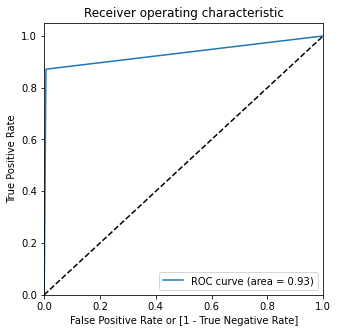

In [101]:
roc17 = draw_roc(y_test, y_pred_xgb_ada) # Plot the ROC Curve
roc17

<font color = Brown>

# Summary of models with various oversampling methods :
    
#### For this problem we will focus on AUC-ROC and Recall (Sensitivity) as we have to catch the Class 1 (Fraud) cases.


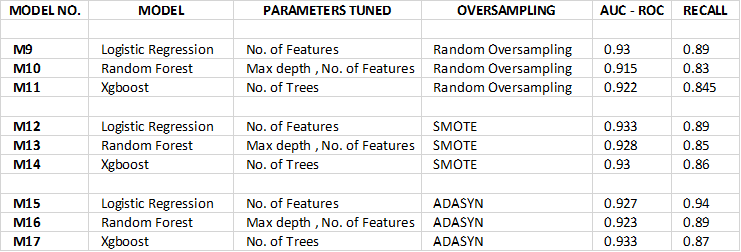

<font color = Brown>

- While using ADASYN we can find a better mix of AUC-ROC and Recall.
- Preferred method for oversampling = ADASYN
- Xgboost and Logistic Regression are the best Models
- #### Let us experiment a bit more with XGBoost parameters to see if we can tune it to get better AUC-ROC / Recall

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
# perform the best oversampling method on X_train & y_train

clf = ___  #initialise the model with optimum hyperparameters
clf.fit( ) # fit on the balanced dataset
print() --> #print the evaluation score on the X_test by choosing the best evaluation metric

### Print the important features of the best model to understand the dataset

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [ ]:
print('Train auc =', metrics.roc_auc_score(_________)
fpr, tpr, thresholds = metrics.roc_curve(_________)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)